### Please power on your laptops!

### Here we will apply some of the schemes that we learned in the last class to a few examples

- Forward Euler
- Lax-Friedrichs
- Lax-Wendroff <-- this will be left as an in-class exercise for you

We will just consider initial value problems, and the same partial differential equation as before:

$$ f_t = f_x , \quad f(0,x) = g(x) $$ 

We already know the exact solution to this equation: $ f(t,x) = g(x+t) $, which is a traveling wave that has whatever shape g(x) had at t = 0

Since we know the exact solution, the point of applying the numerical methods will be to learn how to use/implement thenm and study how they behave. ** We are not yet ready to apply numerical methods to problems with no known analytical solutions **

In [2]:
# Allows us to generate plots in the notebook
%pylab inline

# Provides us with Matlab-like functions, vectors, and matrices
import numpy as np

Populating the interactive namespace from numpy and matplotlib


### Forward Euler: Forward differencing in time, and central differencing in space

Recall in our class notes that we derived the following equation as our numerical scheme:

$$ f^{n+1}_j = f^n_j + \lambda/2 (f^n_{j+1} - f^n_{j-1}) $$

Where 

$$ \lambda = \Delta t / \Delta x $$

Let's actually implement this scheme and see what happens...

... but first we need to make the problem more3 concrete:

- Initial conditions: $ f(0,x) = g(x) = exp(-\sigma x^2) $ with $ \sigma = 5 $
- Domain: $ -10 < x < 10 $
- Set final time: $ t_final = T = 5 $
- Choose grid spacing: $\Delta x = 0.5 $
- Choose a timestep: $\Delta t = 0.1 $

In [13]:
# Solving f_t = f_x using Forward Euler scheme

# Set parameters
T = 5
dx = 0.1
dt = 0.02 # we need a much smaller time step, since our scheme is first order error in time
lam = dt/dx # we can't call it lambda because that is a special python

lboundary = -10
rbounday = 10

numXpoints = int((rbounday - lboundary)/dx)
numTpoints = int(T/dt)

f = np.zeros((numTpoints,numXpoints)) # matrix of zeros of size numTpoints * numXpoints

Good idea when writing (even simple) code to frequently check both that it is correct and that we understand how it works along the way.

- How many rows/columns do we expect f to have?
- How do we set values in the f matrix?

In [14]:
# Number of rows in our matrix, which is the number of time points
len(f)

250

In [15]:
# Number of columns in our matrix, which is the number of spatial gridpoints
len(f[0])

200

In [16]:
# Setting an arbitrary value in the matrix:
f[0][20] = 1
print(f[0][19], " ", f[0][20])

0.0   1.0


In [17]:
f[0][20]

1.0

** Note, based on our previous notation: ** $ f^n_j $

" f[0][20] " would be written in our notes as " $ f^0_{20} $ "

OK, we're ready to set the inital conditions:

In [18]:
# Set inital conditions

for j in range(numXpoints):
    x = j*dx + lboundary
    f[0][j] = exp(-5 * x**2)

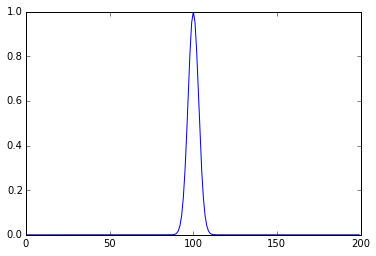

In [19]:
# Let's plot to see what it looks like
plt.plot(f[0])

In [20]:
# Note thast the x-axis isn't correctly labelled
# We only passed 400 values, so plot lists them as value #1, value #2, etc.
# We can fix this by providing another set of data as follows
xdomain = np.arange(lboundary, rbounday, dx)
len(xdomain)

200

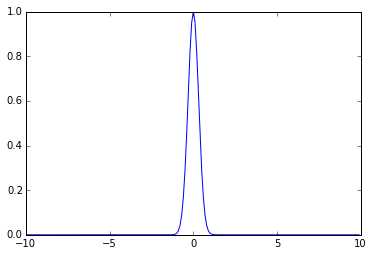

In [21]:
# Plot again, passing in xdomain as a parameter
plt.plot(xdomain, f[0])

We are ready to solve the differential equation.

Recall that we are now going to implement this equation in code:

$$ f^{n+1}_j = f^n_j + \lambda/2 (f^n_{j+1} - f^n_{j-1}) $$ 

In [67]:
# don't run this cell, it will crash
for n in range(numTpoints -1):
    for j in range(numXpoints):
        f[n+1][j] = f[n][j] + lam/2 * (f[n][j+1] - f[n][j-1])

IndexError: index 800 is out of bounds for axis 0 with size 800

In [22]:
# Set inital conditions
for j in range(numXpoints):
    x = j*dx + lboundary
    f[0][j] = exp(-5 * x**2)

# We will apply periodic boundary conditions to deal with the edges
for n in range(numTpoints -1):
    for j in range(numXpoints):
        # Define new variables to specify what j+1 and j-1 mean at the boundaries
        jp1 = j + 1 # what you would expect
        jm1 = j - 1 # what you would expect
        
        if j == numXpoints-1: # if j is at right boundary
            jp1 = 0 # jp1 becomes point at left boundary
        elif j == 0: # if j is at the left boundary
            jm1 = numXpoints - 1 # j becomes point at right boundary
        
        f[n+1][j] = f[n][j] + lam/2 * (f[n][jp1] - f[n][jm1])

#Run

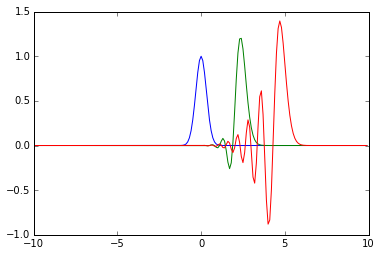

In [23]:
# Plot again, see how the solution evolved in time
plt.plot(xdomain, f[0])
plt.plot(xdomain, f[int(numTpoints/2)])
plt.plot(xdomain, f[numTpoints-1])

### Lax-Friedrichs: Adding stability to Forward Euler

Recall in our class notes, we modified Forward Euler

$$ f^{n+1}_j = f^n_j + \lambda/2 (f^n_{j+1} - f^n_{j-1}) $$ 

by making the following minor modification:

$$ f^{n+1}_j = \frac{f^n_{j+1} + f^n_{j-1}}{2} + \lambda/2 (f^n_{j+1} - f^n_{j-1}) $$ 

**Note: The "plus" sign in the new term was (or might have been) written as a "minus" sign in the previous class. Please make sure it's correct. **

Let's implement this new scheme and see what happens

In [74]:
# Implementing Lax-Friedrichs

# Set parameters
T = 5
dx = 0.5
dt = 0.5 # we need a much smaller time step, since our scheme is first order error in time
lam = dt/dx # we can't call it lambda because that is a special python

lboundary = -10
rbounday = 10

numXpoints = int((rbounday - lboundary)/dx)
numTpoints = int(T/dt)

f = np.zeros((numTpoints,numXpoints)) # matrix of zeros of size numTpoints * numXpoints

xdomain = np.arange(lboundary, rbounday, dx)

# Set inital conditions
for j in range(numXpoints):
    x = j*dx + lboundary
    f[0][j] = exp(-5 * x**2)

# We will apply periodic boundary conditions to deal with the edges
for n in range(numTpoints -1):
    for j in range(numXpoints):
        # Define new variables to specify what j+1 and j-1 mean at the boundaries
        jp1 = j + 1 # what you would expect
        jm1 = j - 1 # what you would expect
        
        if j == numXpoints-1: # if j is at right boundary
            jp1 = 0 # jp1 becomes point at left boundary
        elif j == 0: # if j is at the left boundary
            jm1 = numXpoints - 1 # j becomes point at right boundary
        
        # f[n+1][j] = f[n][j] + lam/2 * (f[n][jp1] - f[n][jm1]) # Forward Euler
        f[n+1][j] = (f[n][jp1] + f[n][jm1])/2 + lam/2 * (f[n][jp1] - f[n][jm1]) # Lax-Friedrichs

#Run

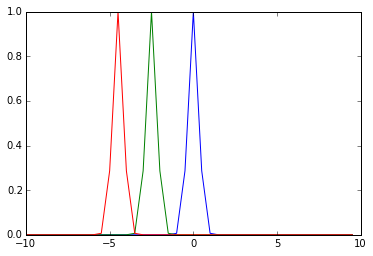

In [75]:
# Plot again, see how the solution evolved in time
plt.plot(xdomain, f[0])
plt.plot(xdomain, f[int(numTpoints/2)])
plt.plot(xdomain, f[numTpoints-1])

### Lax-Wendroff


- Forward Euler $ f^{n+1}_j = f^n_j + \lambda/2 (f^n_{j+1} - f^n_{j-1}) $
- Lax-Friedrichs $ f^{n+1}_j = \frac{f^n_{j+1} + f^n_{j-1}}{2} + \lambda/2 (f^n_{j+1} - f^n_{j-1}) $ 
- Lax-Wendroff $ f^{n+1}_j = f^n_j + \lambda/2 (f^n_{j+1} - f^n_{j-1}) + \lambda^2/2 (f^n_{j+1} + f^n_{j-1} - 2 f^n_j)$ 
